In [1]:
from os import listdir

In [2]:
artist = "Imagine Dragons"
dataPath = f"./Dataset/{artist}/"
lyrics = ""

for song in listdir(dataPath):
    with open(dataPath + song, mode = "r") as songFile:
        lyrics += songFile.read().lower()
        
lyrics = lyrics.split("\n")
print(f"Number of sentences: {len(lyrics)}")

Number of sentences: 3490


In [3]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lyrics)               # Generate the word index dictionary
totalWords = len(tokenizer.word_index) + 1   # With padding which is 0

print(f"Total num words: {totalWords}")
print("=====")
print("Word Index Dictionary")
print(tokenizer.word_index)

Total num words: 1982
=====
Word Index Dictionary
{'the': 1, 'i': 2, 'you': 3, 'to': 4, 'me': 5, 'a': 6, 'and': 7, 'my': 8, 'it': 9, "i'm": 10, 'of': 11, 'in': 12, 'we': 13, 'oh': 14, 'all': 15, 'that': 16, "it's": 17, 'la': 18, 'for': 19, 'is': 20, 'up': 21, 'your': 22, "don't": 23, 'just': 24, 'love': 25, 'be': 26, 'hey': 27, 'on': 28, 'this': 29, 'can': 30, 'know': 31, 'but': 32, 'are': 33, 'out': 34, 'down': 35, 'let': 36, 'so': 37, 'been': 38, 'what': 39, 'with': 40, 'never': 41, 'get': 42, "i've": 43, 'got': 44, 'now': 45, 'go': 46, 'life': 47, 'come': 48, 'when': 49, 'take': 50, "i'll": 51, 'not': 52, 'do': 53, 'from': 54, 'time': 55, 'if': 56, 'like': 57, 'no': 58, 'make': 59, 'everything': 60, 'one': 61, "you're": 62, 'wanna': 63, 'tell': 64, 'see': 65, 'look': 66, 'will': 67, 'want': 68, 'over': 69, 'at': 70, 'where': 71, 'was': 72, 'feel': 73, "'cause": 74, 'they': 75, 'back': 76, 'ready': 77, 'eyes': 78, 'way': 79, 'am': 80, 'believe': 81, 'away': 82, 'mind': 83, 'could': 8

In [5]:
input_sequences = []

for line in lyrics:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre"))
xs, labels = input_sequences[:,:-1] , input_sequences[:,-1]
ys = to_categorical(labels, num_classes = totalWords)

In [6]:
sentence = lyrics[0].split(" ")
print(f"Sample sentence: {sentence}")

token_list = []
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

print(f"Token list: {token_list}")

print(f"\nPadded token list: {xs[0]}")
print(f"Decoded token list to text: {tokenizer.sequences_to_texts([xs[0]])}")

print(f"\nOne-hot label: {ys[0]}")
print(f"Index of label: {np.argmax(ys[0])}")
print(f"Decoded Label: {tokenizer.index_word[365]}")

Sample sentence: ['good', 'morning', 'my', 'love']
Token list: [324, 365, 8, 25]

Padded token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 324]
Decoded token list to text: ['good']

One-hot label: [0. 0. 0. ... 0. 0. 0.]
Index of label: 365
Decoded Label: morning


In [7]:
embeddingDim = 100
lstmUnits = 150
learningRate = 0.01

model = Sequential([
          Embedding(totalWords, embeddingDim, input_length = max_sequence_len - 1),
          Bidirectional(LSTM(lstmUnits)),
          Dense(totalWords, activation = "softmax")
])

model.compile(
    loss = "categorical_crossentropy", 
    optimizer = Adam(learning_rate = learningRate), 
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           198200    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1982)              596582    
                                                                 
Total params: 1,095,982
Trainable params: 1,095,982
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(xs, ys, epochs = 50)

Epoch 1/50
608/608 [==============================] - 31s 45ms/step - loss: 5.1109 - accuracy: 0.1626
Epoch 2/50
608/608 [==============================] - 29s 48ms/step - loss: 3.3019 - accuracy: 0.3837
Epoch 3/50
608/608 [==============================] - 28s 47ms/step - loss: 2.4284 - accuracy: 0.4880
Epoch 4/50
608/608 [==============================] - 29s 47ms/step - loss: 1.9607 - accuracy: 0.5563
Epoch 5/50
608/608 [==============================] - 29s 47ms/step - loss: 1.7002 - accuracy: 0.5965
Epoch 6/50
608/608 [==============================] - 29s 48ms/step - loss: 1.5349 - accuracy: 0.6273
Epoch 7/50
608/608 [==============================] - 29s 48ms/step - loss: 1.4026 - accuracy: 0.6495
Epoch 8/50
608/608 [==============================] - 29s 48ms/step - loss: 1.3290 - accuracy: 0.6641
Epoch 9/50
608/608 [==============================] - 32s 52ms/step - loss: 1.3413 - accuracy: 0.6591
Epoch 10/50
608/608 [==============================] - 30s 49ms/step - loss: 1.325

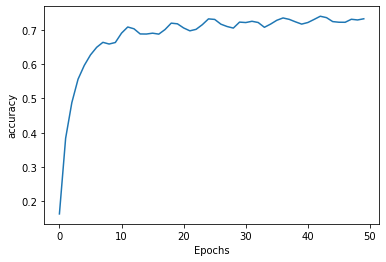

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [21]:
seed_text = "The sky's cloudy but it never rains"
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = "pre")

    probabilities = model.predict(token_list)
    predicted = np.argmax(probabilities, axis = -1)[0]
    if(predicted != 0):
        output_word = tokenizer.index_word[predicted]
        seed_text += " " + output_word

1/1 [==============================] - 0s 24ms/step


In [22]:
print("=============================================== Generated Lyrics ===============================================\n")
print(seed_text)

=============================================== Generated Lyrics ===============================================

The sky's cloudy but it never rains eclipses is in the moon in the umbra of the river and the light up for your ground is a game of hearts feeling else something to make your mind ready to go ready to go ready to go like this fourth just when you hit the ground without poison
